# Prerequisites

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:00


# Zero Shot Image Classification

#### Reference https://huggingface.co/docs/transformers/tasks/zero_shot_image_classification

#### Dog image : https://picsum.photos/id/237/1280/720

![dog](https://picsum.photos/id/237/1280/720)

In [13]:
from transformers import pipeline
classifier = pipeline("zero-shot-image-classification", model = "openai/clip-vit-large-patch14-336")

image_to_classify = "https://picsum.photos/id/237/1280/720"
labels_for_classification =  ["dog",
                              "cat",
                              "panda",
                              "lizard"]
scores = classifier(image_to_classify,
                    candidate_labels = labels_for_classification)


In [14]:
print(f"The highest score is {scores[0]['score']:.3f} for the label {scores[0]['label']}")

The highest score is 0.993 for the label dog


# Zero Shot Object Detection

#### Reference : https://huggingface.co/docs/transformers/tasks/zero_shot_object_detection

In [ ]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

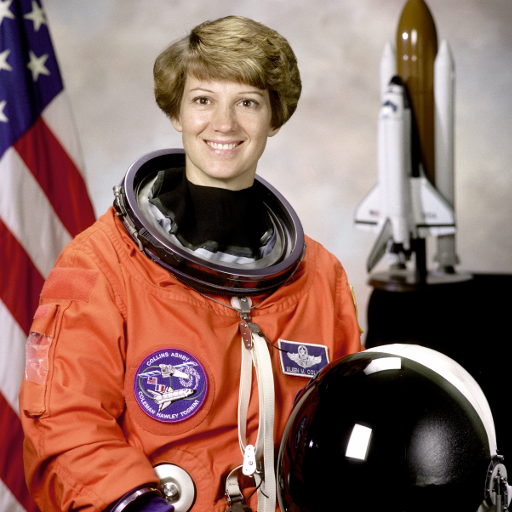

In [ ]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

In [ ]:
predictions = detector(
    image,
    candidate_labels=["human face", "rocket", "dog" , "car" , "nasa badge", "star-spangled banner"],
)
predictions

[{'score': 0.3571361005306244,
  'label': 'human face',
  'box': {'xmin': 180, 'ymin': 71, 'xmax': 271, 'ymax': 178}},
 {'score': 0.28099772334098816,
  'label': 'nasa badge',
  'box': {'xmin': 129, 'ymin': 348, 'xmax': 206, 'ymax': 427}},
 {'score': 0.2110239714384079,
  'label': 'rocket',
  'box': {'xmin': 350, 'ymin': -1, 'xmax': 468, 'ymax': 288}},
 {'score': 0.13790549337863922,
  'label': 'star-spangled banner',
  'box': {'xmin': 1, 'ymin': 1, 'xmax': 105, 'ymax': 509}},
 {'score': 0.1195003092288971,
  'label': 'nasa badge',
  'box': {'xmin': 277, 'ymin': 338, 'xmax': 327, 'ymax': 380}},
 {'score': 0.10649342089891434,
  'label': 'rocket',
  'box': {'xmin': 358, 'ymin': 64, 'xmax': 424, 'ymax': 280}}]

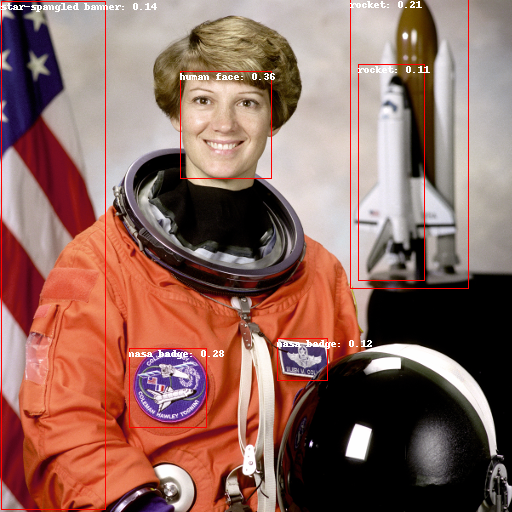

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image